# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Decision Trees Model 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To Tell the Difference Between Poisonous and Edible Mushrooms


![](data/mushrooms.jpg)

Mushroom: spore-bearing fruiting body of a fungus, typically produced above ground on soil or on its food source.

Although there are only a small number of deadly mushroom species, several others can cause particularly severe and unpleasant symptoms. In this project, I'll be using Python to train decision trees and tree-based models with scikit-learn machine learning library to predict whether mushrooms are poisonous or edible.

### Libraries to be used

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import Image  
import pydotplus

### Getting the Mushrooms dataset

In [2]:
df = pd.read_csv("data/agaricus-lepiota.data")

# copy of the above dataframe
dataset = df.copy()

In [3]:
# A view of the first five rows
dataset.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### PREPROCESSING THE DATA

- This will entail renaming both column heading and the row data to be comprehensible.
- Checking for and removing any invalid or missing values

In [4]:
# Getting column and row names
url = "https://umuzi-org.github.io/tech-department/projects/data-science-specific/decision-trees/"
html = urlopen(url)
soup = BeautifulSoup(html, 'html')

In [5]:
# Getting specific text from the soup object
addition_info, columns_names, details = [], [], []

for text in soup.find_all('td'):
    addition_info.append(text.get_text())
    
for index, value in enumerate(addition_info):
    if index == 0:
        columns_names.append(value)
    elif index % 2 == 0:
        columns_names.append(value)
    else:
        details.append(value) 

In [6]:
# renaming columns heading
rename_columns = {dataset.columns[i]: columns_names[i] for i in range(len(dataset.columns))}

dataset = dataset.rename(columns=rename_columns)

dataset.head(2)

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [7]:
# Rename row values
def str_to_dict(element):
    key, value, split_str = [], [], []
    
    # first split
    output = element.split("=")  
    
    second_split = [split_str.append(v.split(" ")) for i, v in enumerate(output)]
        
    # flatten the list        
    output_list = list(np.concatenate(split_str))

    iterate_output_list = [value.append(v) if i % 2 == 0 else key.append(v) for i, v in enumerate(output_list)]
       
    # removing common character
    for i,v in enumerate(key):
        key[i] = key[i].replace(",","")
        
    # create and return final dictionary  
    return {key[i]: value[i] for i in range(len(key))}

In [8]:
# For each column values, iterate and rename values
increment = 0
for (column_name, column_data) in dataset.iteritems():
    dataset[column_name] = dataset[column_name].map(str_to_dict(details[increment]))
    increment += 1
    
dataset["classes"] = dataset["classes"].fillna("poisonous")

In [9]:
# A view of how the dataset frame looks like
dataset.head(10)

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
5,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
6,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
7,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
8,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows
9,edible,convex,scaly,yellow,bruises,anise,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses


In [10]:
# Missing values
dataset.columns[dataset.isnull().any()].tolist()

[]

The above empty list indicates that the are no missing (or null) in the dataset

In [11]:
# Saving dataframes locally
dataset.to_csv("dataset.csv")

### EXPLORING THE DATA

- Getting a description of the data
- Information from the data
- And a closer look at the target variable

In [12]:
# Descriptive statistics
dataset.describe()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


Due to the fact that all the values in the dataset consist of only categorical variables, the describe method is not as useful as usual. The unique items can be used to validate that web scraping was successful and that the above written function to rename heading and data has performed as required.

In [13]:
# dataframe info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
classes                     8123 non-null object
cap-shape                   8123 non-null object
cap-surface                 8123 non-null object
cap-color                   8123 non-null object
bruises?                    8123 non-null object
odor                        8123 non-null object
gill-attachment             8123 non-null object
gill-spacing                8123 non-null object
gill-size                   8123 non-null object
gill-color                  8123 non-null object
stalk-shape                 8123 non-null object
stalk-root                  8123 non-null object
stalk-surface-above-ring    8123 non-null object
stalk-surface-below-ring    8123 non-null object
stalk-color-above-ring      8123 non-null object
stalk-color-below-ring      8123 non-null object
veil-type                   8123 non-null object
veil-color                  8123 non-null object
ring-number

The dataset has no missing values, a total of 23 columns and 8123 of rows. Dtype of object, meaning the dataset has only categorical variables

In [14]:
dataset["classes"].value_counts()

edible       4208
poisonous    3915
Name: classes, dtype: int64

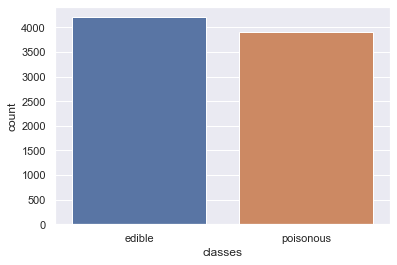

In [15]:
sns.set()

sns.countplot(x="classes", data=dataset)

Target variables fairly distributed with a difference of 293 between edible and poisonous mushrooms

### Preparing the data for a tree model

- Splitting the data into features and labels
- Encode categorical features as a one-hot numeric array
- Splitting the data into training and testing data

In [16]:
# Labels
y = dataset["classes"]
# Features
X = dataset.drop("classes", axis=1)

In [17]:
# Encode categorical features
onehotencoder = OneHotEncoder()

X_transformed = onehotencoder.fit_transform(X)

In [18]:
y_transformed = pd.get_dummies(y,drop_first=True)

In [19]:
# Look at the transformed dataframe
y_transformed.head(3)

,poisonous
0,0
1,0
2,1


In [20]:
X_transformed

<8123x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178706 stored elements in Compressed Sparse Row format>

In [21]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.4, random_state=50)

# BUILDING A DECISION TREE MODEL

#### Training a model

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
#Predicting
predict_model = model.predict(X_test)

#### Testing

From the confusion matrix, we can determine the model accuracy as (TP+TN)/(TP+TN+FP+FN) which is the proportion of data that was correctly classified

In [25]:
from sklearn.metrics import confusion_matrix

labels = ['Edible', 'Poisonous']

pd.DataFrame(data=confusion_matrix(y_test, predict_model), index=labels, columns=labels)

,Edible,Poisonous
Edible,1610,0
Poisonous,0,1640


The rows represent the actual output, while the columns indicate the predicted output. We see that we have classified 809+816=1625 cases correctly, and 0+0=0 cases incorrectly.

#### Classification Reports

In [26]:
print('Classification Report')
print(classification_report(y_test, predict_model, target_names=labels))

Classification Report
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1610
   Poisonous       1.00      1.00      1.00      1640

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [ ]:
# Importance Features

In [54]:
importances = model.feature_importances_

im = pd.DataFrame(importances, index =x_.columns)

# Top 10 important features in making a prediction
im.sort_values(by=[0],ascending=False ).head(10)

,0
odor_none,0.604012
bruises?_no,0.189308
stalk-root_equal,0.089146
spore-print-color_chocolate,0.065606
spore-print-color_green,0.029164
stalk-surface-below-ring_scaly,0.013992
ring-type_pendant,0.006298
cap-surface_grooves,0.001644
cap-shape_conical,0.000823
gill-size_broad,0.000007


# Conclusion

The model has an accurate score of 100 %, given the dataset it was able to make prefect predictions. This of course might due to over-fittingwhich I personally doubt. An in-depth look is required in selection features and training a model using different parameters.